# 01. 선형회귀모델
## 1-1. 단일선형회귀

In [12]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

Epoch [100 / 1000], Loss: 3.6568
Epoch [200 / 1000], Loss: 3.6430
Epoch [300 / 1000], Loss: 3.6307
Epoch [400 / 1000], Loss: 3.6197
Epoch [500 / 1000], Loss: 3.6096
Epoch [600 / 1000], Loss: 3.6006
Epoch [700 / 1000], Loss: 3.5923
Epoch [800 / 1000], Loss: 3.5849
Epoch [900 / 1000], Loss: 3.5782
Epoch [1000 / 1000], Loss: 3.5721


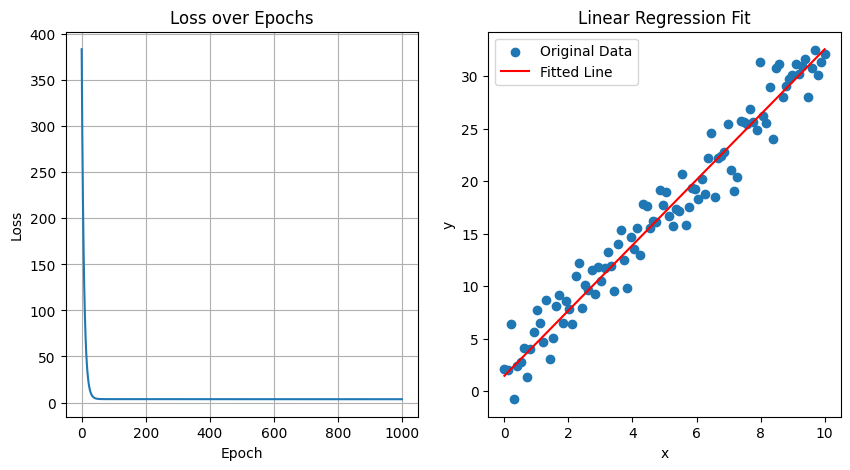

model Parameters: 
linear.weight: tensor([[3.1109]])
linear.bias: tensor([1.4786])


In [13]:
# 1. 데이터 생성
x = torch.linspace(0, 10, 100).view(-1, 1) # 입력 데이터
y = 3 * x + 2 + torch.randn(100, 1) * 2

# 2. 모델 정의
class LinearRegressionModel(nn.Module):
    def __init__(self,):
        super().__init__()
        self.linear = nn.Linear(1, 1) # 입력 및 출력  각 1개
    
    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

# 3. 손실 함수, 옵티마이저 정의
criterion = nn.MSELoss() # 평균 제곱 오차
optimizer = optim.SGD(model.parameters(), lr = 0.001) # 확률적 경사 하강법

# 4. 가중치 업데이트
epochs = 1000 # 학습 반복 횟수
losses = []

for epoch in range(epochs):
    optimizer.zero_grad() # 기울기 초기화
    outputs = model(x) # 예측값 계산
    loss = criterion(outputs, y) # 손실 계산
    loss.backward() # 역전파
    optimizer.step() # 가중치 업데이트

    losses.append(loss.item())

    # 100번에 한번씩 로그 출력
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1} / {epochs}], Loss: {loss.item():.4f}")

# 5. 결과 시각화
plt.figure(figsize = (10, 5))

# 6. 손실 감소 그래프
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()

# 7. 데이터와 예측 결과
plt.subplot(1, 2, 2)
plt.scatter(x.numpy(), y.numpy(), label = "Original Data")
plt.plot(x.numpy(), model(x).detach().numpy(), color = "red", label = "Fitted Line")
plt.title("Linear Regression Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.show()

print("model Parameters: ")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")


### 훈련 데이터, 평가 데이터 분리

Epoch [100 / 1000], Loss: 5.1996
Epoch [200 / 1000], Loss: 5.0698
Epoch [300 / 1000], Loss: 4.9511
Epoch [400 / 1000], Loss: 4.8425
Epoch [500 / 1000], Loss: 4.7429
Epoch [600 / 1000], Loss: 4.6518
Epoch [700 / 1000], Loss: 4.5683
Epoch [800 / 1000], Loss: 4.4919
Epoch [900 / 1000], Loss: 4.4219
Epoch [1000 / 1000], Loss: 4.3577
최종 Test Loss:  4.1610


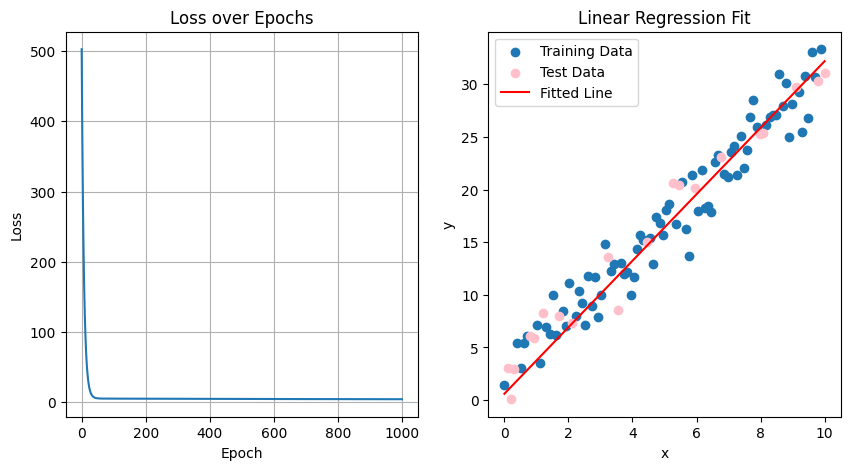

In [15]:
# 1. 데이터 생성
x = torch.linspace(0, 10, 100).view(-1, 1) # 입력 데이터
y = 3 * x + 2 + torch.randn(100, 1) * 2

# Train / Test set 분리 (8:2 로 분리)
num_train = int(len(x) * 0.8)
indices = torch.randperm(len(x))
train_idx, test_idx = indices[:num_train], indices[num_train:]

x_train, y_train = x[train_idx], y[train_idx]
x_test, y_test = x[test_idx], y[test_idx]

# 2. 모델 정의
class LinearRegressionModel(nn.Module):
    def __init__(self,):
        super().__init__()
        self.linear = nn.Linear(1, 1) # 입력 및 출력  각 1개
    
    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

# 3. 손실 함수, 옵티마이저 정의
criterion = nn.MSELoss() # 평균 제곱 오차
optimizer = optim.SGD(model.parameters(), lr = 0.001) # 확률적 경사 하강법

# 4. 가중치 업데이트
epochs = 1000 # 학습 반복 횟수
losses = []

for epoch in range(epochs):
    optimizer.zero_grad() # 기울기 초기화
    outputs = model(x_train) # 예측값 계산
    loss = criterion(outputs, y_train) # 손실 계산
    loss.backward() # 역전파
    optimizer.step() # 가중치 업데이트

    losses.append(loss.item())

    # 100번에 한번씩 로그 출력
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1} / {epochs}], Loss: {loss.item():.4f}")

# 5. 테스트 데이터 평가
with torch.no_grad():
    test_output = model(x_test)
    test_loss = criterion(test_output, y_test)
print(f"최종 Test Loss: {test_loss.item(): .4f}")

# 6. 결과 시각화
plt.figure(figsize = (10, 5))

# 7. 손실 감소 그래프
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()

# 8. 데이터와 예측 결과
plt.subplot(1, 2, 2)
plt.scatter(x_train.numpy(), y_train.numpy(), label = "Training Data")
plt.scatter(x_test.numpy(), y_test.numpy(), label = "Test Data", color = "pink")
plt.plot(x.numpy(), model(x).detach().numpy(), color = "red", label = "Fitted Line")
plt.title("Linear Regression Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.show()

# print("model Parameters: ")
# for name, param in model.named_parameters():
#     print(f"{name}: {param.data}")

## 1-2. 다중 선형 회귀

Epoch [100 / 1000], Loss: 3.3811
Epoch [200 / 1000], Loss: 3.1566
Epoch [300 / 1000], Loss: 2.9845
Epoch [400 / 1000], Loss: 2.8479
Epoch [500 / 1000], Loss: 2.7394
Epoch [600 / 1000], Loss: 2.6531
Epoch [700 / 1000], Loss: 2.5843
Epoch [800 / 1000], Loss: 2.5295
Epoch [900 / 1000], Loss: 2.4856
Epoch [1000 / 1000], Loss: 2.4505


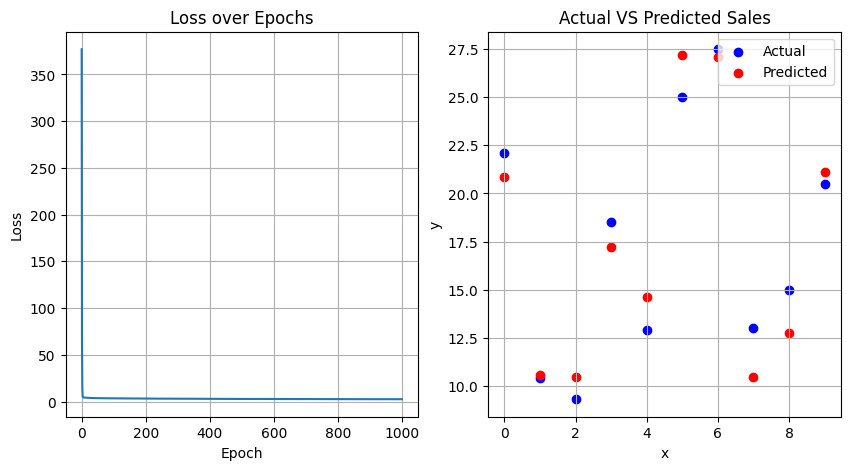

model Parameters: 
linear.weight: tensor([[0.2037, 0.4187, 0.0117]])
linear.bias: tensor([-0.1380])


In [ ]:
# 1. 데이터 입출력 정의
x = torch.tensor([[50.0, 25.0, 30.0],
                  [10.0, 20.0, 25.0],
                  [5.0, 22.0, 30.0],
                  [30.0, 26.0, 28.0],
                  [40.0, 15.0, 28.0],
                  [60.0, 35.0, 40.0],
                  [70.0, 30.0, 35.0],
                  [20.0, 15.0, 20.0],
                  [25.0, 18.0, 22.0],
                  [45.0, 28.0, 30.0]], dtype=torch.float32)

y = torch.tensor([[22.1], [10.4], [9.3], [18.5], [12.9], 
                  [25.0], [27.5], [13.0], [15.0], [20.5]], dtype=torch.float32)

# 2. 모델 정의
n_features = x.shape[1]

class MultipleLinearRegressionModel(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.linear = nn.Linear(n_features, 1) # 입력 n_features, 출력 1
    
    def forward(self, x):
        return self.linear(x)

model = MultipleLinearRegressionModel(n_features)

# 3. 손실 함수 및 옵티마이저
criterion = nn.MSELoss() # 평균 제곱 오차
optimizer = optim.SGD(model.parameters(), lr = 0.0001) # SGD

epochs = 1000
losses = []

# 4. 학습 루프
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(x) # 예측값
    loss = criterion(outputs, y) # 손실 계산
    loss.backward() # 역전파
    optimizer.step() # 가중치 업데이트

    losses.append(loss.item())

    # 100번에 한번씩 로그 출력
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1} / {epochs}], Loss: {loss.item():.4f}")

# 5. 결과 시각화
plt.figure(figsize = (10, 5))

# 6. 손실 감소 그래프
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()

predicted = model(x).detach().numpy()
actual = y.numpy()

# 7. 데이터와 예측 결과
plt.subplot(1, 2, 2)
plt.scatter(range(len(actual)), actual, label = "Actual", color = "b")
plt.scatter(range(len(predicted)), predicted, label = "Predicted", color = "r")
plt.title("Actual VS Predicted Sales")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()

plt.show()

print("model Parameters: ")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")
